In [286]:
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.fftpack import fft

%matplotlib inline

In [287]:
data=pd.read_excel("../data/data.xlsx")
data=data.iloc[:,1:]
data.head(25)

,MD,Data 1,Data 2,Data 3,Data 4,Data 5,Data 6,Data 7,Data 8,Data 9,...,Data 13,Data 14,Data 15,Data 16,Data 17,Data 18,Data 19,Data 20,Data 21,Data 22
0,1036.7,-999.25,-999.250,62.62,63.01,64.26,70.09,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
1,1036.8,-999.25,-999.250,62.43,62.85,63.94,69.79,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
2,1036.9,-999.25,-999.250,62.24,62.69,63.62,69.50,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
3,1037.0,-999.25,-999.250,62.06,62.54,63.30,69.21,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
4,1037.1,-999.25,-999.250,61.87,62.38,62.98,68.92,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
5,1037.2,-999.25,-999.250,61.69,62.22,62.66,68.63,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
6,1037.3,-999.25,-999.250,61.50,62.07,62.34,68.33,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
7,1037.4,-999.25,-999.250,61.31,61.91,62.02,68.04,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
8,1037.5,-999.25,-999.250,61.13,61.76,61.70,67.75,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
9,1037.6,-999.25,-999.250,60.94,61.60,61.38,67.46,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25


In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5374 entries, 0 to 5373
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MD       5374 non-null   float64
 1   Data 1   5374 non-null   float64
 2   Data 2   5374 non-null   float64
 3   Data 3   5374 non-null   float64
 4   Data 4   5374 non-null   float64
 5   Data 5   5374 non-null   float64
 6   Data 6   5374 non-null   float64
 7   Data 7   5374 non-null   float64
 8   Data 8   5374 non-null   float64
 9   Data 9   5374 non-null   float64
 10  Data 10  5374 non-null   float64
 11  Data 11  5374 non-null   float64
 12  Data 12  5374 non-null   float64
 13  Data 13  5374 non-null   float64
 14  Data 14  5374 non-null   float64
 15  Data 15  5374 non-null   float64
 16  Data 16  5374 non-null   float64
 17  Data 17  5374 non-null   float64
 18  Data 18  5374 non-null   float64
 19  Data 19  5374 non-null   float64
 20  Data 20  5374 non-null   float64
 21  Data 21  5374 

In [289]:
data.describe()

,MD,Data 1,Data 2,Data 3,Data 4,Data 5,Data 6,Data 7,Data 8,Data 9,...,Data 13,Data 14,Data 15,Data 16,Data 17,Data 18,Data 19,Data 20,Data 21,Data 22
count,5374.00000,5374.000000,5374.000000,5374.000000,5374.000000,5374.00000,5374.000000,5374.000000,5374.000000,5374.000000,...,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000,5374.000000
mean,1305.35000,787.362707,101.020935,-20.474635,-15.765551,-16.84708,-10.446262,-52.012499,-54.572118,-52.662599,...,737.543947,0.863623,142.950612,449.194906,17.350977,190.185853,237.639682,114.373608,199.271306,2406.553058
std,155.14845,397.161753,264.310826,235.130201,236.238792,236.03966,237.571846,227.907023,227.282495,227.741966,...,386.087815,287.141632,3178.226835,4288.585021,233.603545,2290.334805,288.024730,742.127865,286.898304,3177.329875
min,1036.70000,-999.250000,-999.250000,-999.250000,-999.250000,-999.25000,-999.250000,-999.250000,-999.250000,-999.250000,...,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000
25%,1171.02500,872.320000,159.745000,31.310000,37.170000,34.54000,41.320000,2.070000,0.080000,2.109225,...,820.040000,10.437750,8.472000,10.350750,61.900000,8.577500,278.440000,18.310000,171.507500,332.829750
50%,1305.35000,876.205000,164.411000,34.080000,39.435000,37.42000,44.280000,2.320000,0.100000,2.132400,...,823.925000,32.148500,31.782000,30.519000,71.400000,32.187000,334.490000,45.241500,296.695000,952.636000
75%,1439.67500,877.490000,167.945000,38.670000,43.160000,41.80750,48.720000,2.760000,0.130000,2.169950,...,825.210000,45.268750,38.330250,38.998750,77.900000,40.373000,345.230000,126.247750,348.137500,3441.569000
max,1574.00000,880.380000,188.380000,62.620000,63.010000,88.53000,90.880000,17.220000,0.240000,2.360000,...,828.100000,2596.640000,61625.301000,44520.000000,108.900000,36871.000000,357.190000,10308.800000,357.190000,17793.000000


In [290]:
def get_data_with_frequency(data,frequency,name=None):
    if name is None:
         return data[::frequency]
    else:
         if name in data.columns:
               return data[['MD',name]][::frequency]
         else:
              return None

In [291]:
def get_index_work(data,name):  
    data_index=[]
    md_values = data['MD'].values 

    start_node=None
    for i, value in enumerate(data[name]):
        if value!=-999.25 and start_node is None:
            # start_node=md_values[i]
            start_node=i
        elif value==-999.25 and start_node is not None:
            # data_index.append((start_node,md_values[i-1]))
            data_index.append((start_node,i-1))
            start_node=None
    if start_node is not None:
            # data_index.append((start_node, md_values[-1]))
            data_index.append((start_node,i-1))
    return data_index

In [292]:
def get_index_not_work(data,name):
    data_index=[]
    md_values = data['MD'].values

    start_node=None
    for i, value in enumerate(data[name]):
        if value==-999.25 and start_node is None:
            # start_node=md_values[i]
            start_node=i
        elif value!=-999.25 and start_node is not None:
            # data_index.append((start_node,md_values[i-1]))
            data_index.append((start_node,i-1))
            start_node=None
    if start_node is not None:
            # data_index.append((start_node, md_values[-1]))
            data_index.append((start_node,i-1))
    return data_index

In [293]:
def get_index_data(data):
    data_index ={}
    
    data_index_work={}
    data_index_not_work={}
    
    for name in data.columns[1:]:
        data_index_work[name] = get_index_work(data,name)
        data_index_not_work[name] = get_index_not_work(data,name)

    data_index['work']=data_index_work
    data_index['not_work']=data_index_not_work
    return data_index



In [294]:
print(get_index_work(data,'Data 12'))
print(get_index_not_work(data,'Data 12'))

[(253, 5372)]
[(0, 252)]


In [295]:
data_index=get_index_data(data)
data_index

{'work': {'Data 1': [(253, 5372)],
  'Data 2': [(20, 5100)],
  'Data 3': [(0, 5080)],
  'Data 4': [(0, 5080)],
  'Data 5': [(0, 5080)],
  'Data 6': [(0, 5080)],
  'Data 7': [(25, 5104)],
  'Data 8': [(25, 5104)],
  'Data 9': [(25, 5104)],
  'Data 10': [(255, 5332)],
  'Data 11': [(256, 5333)],
  'Data 12': [(253, 5372)],
  'Data 13': [(253, 5372)],
  'Data 14': [(135, 5246)],
  'Data 15': [(135, 5246)],
  'Data 16': [(135, 5246)],
  'Data 17': [(109, 5213)],
  'Data 18': [(135, 5246)],
  'Data 19': [(137, 5252)],
  'Data 20': [(137, 5252)],
  'Data 21': [(138, 5254)],
  'Data 22': [(138, 5254)]},
 'not_work': {'Data 1': [(0, 252)],
  'Data 2': [(0, 19), (5101, 5372)],
  'Data 3': [(5081, 5372)],
  'Data 4': [(5081, 5372)],
  'Data 5': [(5081, 5372)],
  'Data 6': [(5081, 5372)],
  'Data 7': [(0, 24), (5105, 5372)],
  'Data 8': [(0, 24), (5105, 5372)],
  'Data 9': [(0, 24), (5105, 5372)],
  'Data 10': [(0, 254), (5333, 5372)],
  'Data 11': [(0, 255), (5334, 5372)],
  'Data 12': [(0, 252)

In [309]:
def plot(data,start=1036.7,end=1574.0,index=None,scatter=True,color_='green'):
    name=data.columns[1]
    init_value=data['MD'].iloc[0]
    h=data['MD'].iloc[1]-init_value

    plt.title(name)
    plt.xlabel('MD')
    plt.grid(True)

    section_start=int(abs(start-init_value)/h)
    section_end=int(abs(end-init_value)/h)

        
    if scatter:
        plt.scatter(data['MD'][section_start:section_end],data[name][section_start:section_end],color=color_)
    else:
        plt.plot(data['MD'][section_start:section_end],data[name][section_start:section_end],color=color_)



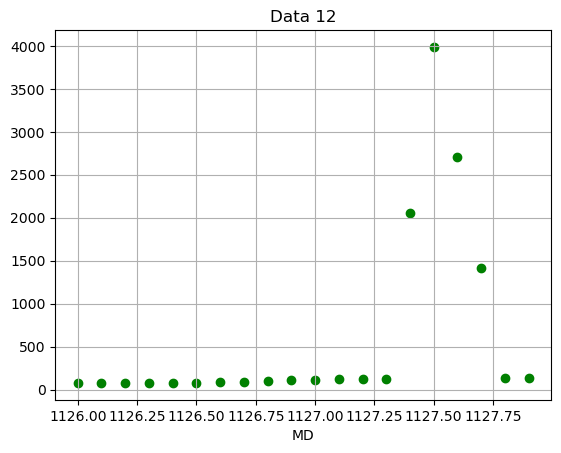

In [313]:
plot(data=get_data_with_frequency(data,1,'Data 12'),start=1126,end=1128,scatter=True)

In [305]:
def simple_filter(data):
    

SyntaxError: incomplete input (117553797.py, line 2)